In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
X_train =[]
y_train =[]
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

In [ ]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(regressor.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
38/38 [==============================] - 16s 163ms/step - loss: 0.0429
Epoch 2/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0043
Epoch 13/100

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


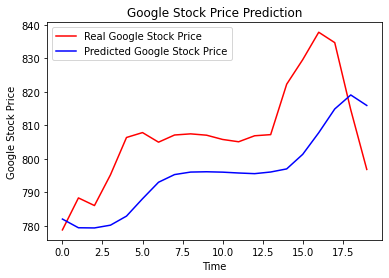

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# 1 Perform Google’s stock price prediction for all the columns, present in the Google_Stock_Price_Train.csv  and Google_Stock_Price_Train.csv.

Update the parameters so that they can converge toward the minimum of the loss function


Change the number of training samples to minimize the difference between real and predicted values.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:6].values

In [ ]:

# print(training_set)
sc = MinMaxScaler(feature_range= (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, :])
  y_train.append(training_set_scaled[i, :])
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))
regressor = Sequential()
regressor.add(LSTM(units = 60, return_sequences = True, input_shape=(X_train.shape[1], 5)))
regressor.add(Dropout (0.5))
regressor.add(LSTM(units=60, return_sequences = True))
regressor.add(Dropout (0.5))
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout (0.5))
regressor.add(LSTM(units=60))
regressor.add(Dropout (0.5))
regressor.add(Dense (units = 5))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs=5, batch_size = 35)

Epoch 1/5
35/35 [==============================] - 12s 133ms/step - loss: 0.0524
Epoch 2/5
35/35 [==============================] - 5s 135ms/step - loss: 0.0240
Epoch 3/5
35/35 [==============================] - 5s 136ms/step - loss: 0.0204
Epoch 4/5
35/35 [==============================] - 5s 134ms/step - loss: 0.0191
Epoch 5/5
35/35 [==============================] - 5s 135ms/step - loss: 0.0159


1/1 [==============================] - 0s 42ms/step


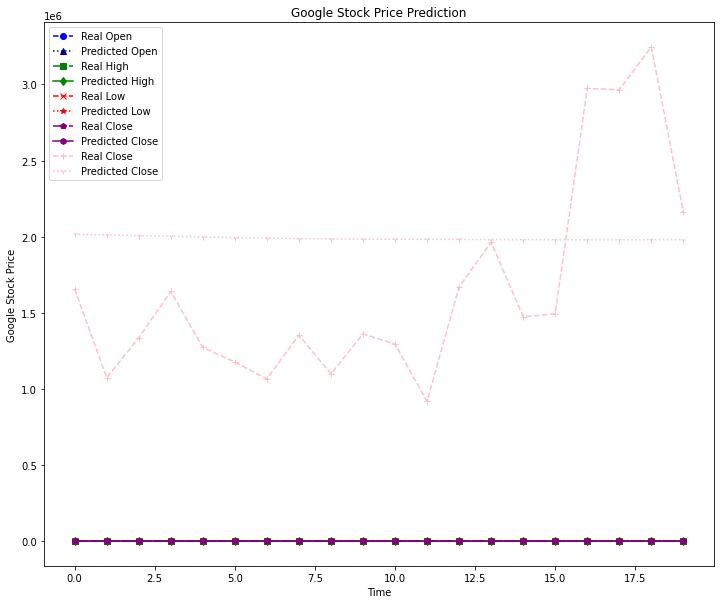

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:6].values
dataset_total = pd.concat((dataset_train.iloc[:, 1:6], dataset_test.iloc[:, 1:6]), axis=0)
inputs=dataset_total[len (dataset_total) - len(dataset_test)- 60:].values
inputs = inputs.reshape(-1,5)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs [i-60:i, :])
X_test = np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
fig, ax = plt.subplots(figsize=(12, 10))

# plot the real and predicted open prices
ax.plot(real_stock_price[:,0], linestyle='--', marker='o', color='blue', label='Real Open')
ax.plot(predicted_stock_price[:,0], linestyle=':', marker='^', color='darkblue', label='Predicted Open')

# plot the real and predicted high prices
ax.plot(real_stock_price[:,1], linestyle='-.', marker='s', color='green', label='Real High')
ax.plot(predicted_stock_price[:,1], linestyle='-', marker='d', color='green', label='Predicted High')

# plot the real and predicted low prices
ax.plot(real_stock_price[:,2], linestyle='--', marker='x', color='red', label='Real Low')
ax.plot(predicted_stock_price[:,2], linestyle=':', marker='*', color='red', label='Predicted Low')

# plot the real and predicted close prices
ax.plot(real_stock_price[:,3], linestyle='-.', marker='p', color='purple', label='Real Close')
ax.plot(predicted_stock_price[:,3], linestyle='-', marker='h', color='purple', label='Predicted Close')

# plot the real and predicted close prices
ax.plot(real_stock_price[:,4], linestyle='--', marker='+', color='pink', label='Real Close')
ax.plot(predicted_stock_price[:,4], linestyle=':', marker='1', color='pink', label='Predicted Close')

ax.set_title('Google Stock Price Prediction')
ax.set_xlabel('Time')
ax.set_ylabel('Google Stock Price')
ax.legend()
plt.show()


# 2- Update the parameters so that they can converge toward the minimum of the loss function



In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'SGD', loss = 'mean_squared_error')
print(regressor.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
38/38 [==============================] - 12s 123ms/step - loss: 0.0860
Epoch 2/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0446
Epoch 3/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0278
Epoch 4/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0156
Epoch 5/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0082
Epoch 6/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0069
Epoch 7/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0065
Epoch 8/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0066
Epoch 9/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0066
Epoch 10/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0059
Epoch 11/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0062
Epoch 12/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0060
Epoch 13/100

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

NotFittedError: ignored

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# 3- Change the number of training samples to minimize the difference between real and predicted values.

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
X_train =[]
y_train =[]
for i in range(150, 1258):
  X_train.append(training_set_scaled[i-150:i, 0])
  y_train.append(training_set_scaled[i, 0])

In [ ]:
dataset_train

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(regressor.summary())

In [ ]:
regressor.fit(X_train, y_train, epochs = 150, batch_size= 32)

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()